In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import os 
os.getcwd()

'C:\\Users\\mrabh\\Documents\\Sundram_04\\TSF'

In [3]:
data=pd.read_csv("D:\\Data Set ML\\TSF DATA\\international-airline-passengers.csv")

In [3]:
data.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [4]:
data.columns

Index(['Month', 'International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60'], dtype='object')

In [5]:
data.rename(columns={"Month":"Month","International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60":"Thousand Of Passenger"},inplace=True)

In [6]:
 data.tail()

,Month,Thousand Of Passenger
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [7]:
data=data.drop([144],axis=0)

In [8]:
data.tail()

,Month,Thousand Of Passenger
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


In [9]:
# YYYY-MM-DD Format Are required To Predict The Passengers data
from numpy import log
from pandas import Series
from datetime import datetime

In [10]:
data["Month"]=pd.to_datetime(data["Month"])

In [11]:
data.head()

,Month,Thousand Of Passenger
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [12]:
# Setting As a Index Month Column
data.set_index("Month",inplace=True)

In [13]:
data.head()

,Thousand Of Passenger
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<AxesSubplot:xlabel='Month'>

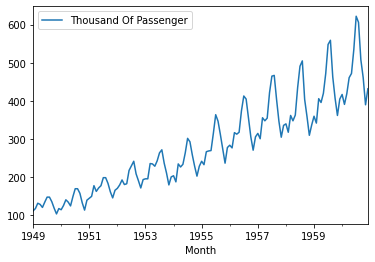

In [14]:
data.plot()

In [15]:
#!pip install statsmodels=  I install before,,,,,,

In [16]:
# We Wanted To wheather we Have Below Listed Components Are or Not
# Actual Visualization
#1) Trend
#2) Seasonality
#3) Cyclicity
#4) Noisy/Irregular

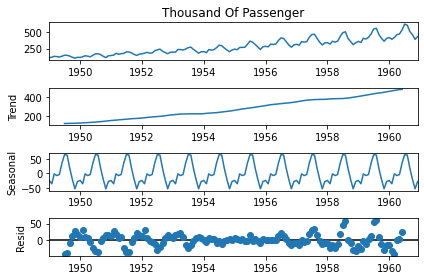

In [17]:
# By The Help Of Decomposition To check The Dataset
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(data["Thousand Of Passenger"],period=12)
decomposition.plot()
plt.show()

In [18]:
# We  Have Both Trend And Seasonality Given In The Datset 
# So we build are Model by considering Both (Trend And Seasonality)

# Note: We Can do Forecasting if and only if when Data is stationary
# "STATIONARY" 

# : What Is The Meaning Of  Stationary ?*****

# We can Check Stationary In time Series Forecasting By Using 
# " Augmented Dickey Fuller Test "

In [19]:
# Augmented Dickey Fullaer Test - To Check Data Is Stationary Or Non Stationary 

In [20]:
from statsmodels.tsa.stattools import adfuller

In [21]:
adfuller(data["Thousand Of Passenger"])

(0.8153688792060488,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

In [22]:
def adf_check(timeseries):
    result=adfuller(timeseries)
    print("Augmented Dickey Fuller Test")
    labels=["ADF Test Statistics","p-values","#Lags","No Of Obs"]
    
    for r,l in zip(result,labels):
        print(l +" : " + str(r))
        
    if result[1] <=0.05:
        print("Strong Evidence Against Null Hypothesis and my timeseries is stationary")
    else:
        print("Weak Evidence Against Null Hypothesis And My Time Series Not Stationary")

In [23]:
adf_check(data["Thousand Of Passenger"])

Augmented Dickey Fuller Test
ADF Test Statistics : 0.8153688792060488
p-values : 0.991880243437641
#Lags : 13
No Of Obs : 130
Weak Evidence Against Null Hypothesis And My Time Series Not Stationary


##### Since My data is Non-Stationary so WE Have to Use Lag And Diffrence to make dataset Stationary

In [24]:
data["1st Diff"]=data["Thousand Of Passenger"] -data["Thousand Of Passenger"].shift(1)

In [25]:
data.head(10)

,Thousand Of Passenger,1st Diff
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0
1949-06-01,135.0,14.0
1949-07-01,148.0,13.0
1949-08-01,148.0,0.0
1949-09-01,136.0,-12.0


In [26]:
adf_check(data["1st Diff"].dropna())

Augmented Dickey Fuller Test
ADF Test Statistics : -2.8292668241700056
p-values : 0.054213290283824704
#Lags : 12
No Of Obs : 130
Weak Evidence Against Null Hypothesis And My Time Series Not Stationary


In [27]:
data["2nd Diff"]=data["1st Diff"]-data["1st Diff"].shift(1)

In [28]:
adf_check(data["2nd Diff"].dropna())

Augmented Dickey Fuller Test
ADF Test Statistics : -16.384231542468548
p-values : 2.732891850013967e-29
#Lags : 11
No Of Obs : 130
Strong Evidence Against Null Hypothesis and my timeseries is stationary


In [29]:
# Now We Have To Assign Trend And Seasonality parameter
#pdq = Trend
# p = 2
# d = 2
# q= 2
# PDQ
# P=2
# D=1
# Q=5

In [32]:
data["seasonality"]=data["Thousand Of Passenger"]-data["Thousand Of Passenger"].shift(12)

In [35]:
data.head(20)

,Thousand Of Passenger,1st Diff,2nd Diff,seasonality
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
1949-06-01,135.0,14.0,22.0,NaN
1949-07-01,148.0,13.0,-1.0,NaN
1949-08-01,148.0,0.0,-13.0,NaN
1949-09-01,136.0,-12.0,-12.0,NaN


In [36]:
adf_check(data["seasonality"].dropna())

Augmented Dickey Fuller Test
ADF Test Statistics : -3.3830207264924805
p-values : 0.011551493085514982
#Lags : 1
No Of Obs : 130
Strong Evidence Against Null Hypothesis and my timeseries is stationary


In [37]:
 # To find p/qAnd P/Q value
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

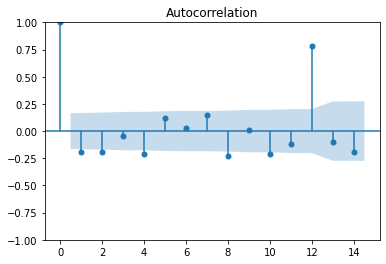

In [38]:
# Trend
# To find q_value
plot_acf(data["2nd Diff"].dropna(),lags=14)
plt.show()

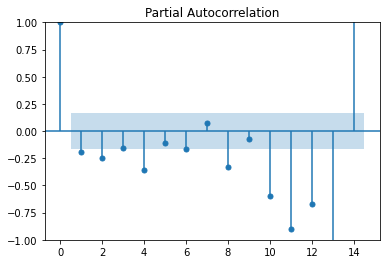

In [39]:
# To Find p_value
plot_pacf(data["2nd Diff"].dropna(),lags=14)
plt.show()

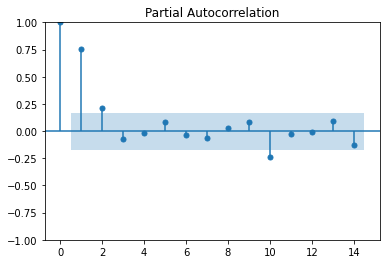

In [40]:
# To find P_value for Seasonality
plot_pacf(data["seasonality"].dropna(),lags=14)
plt.show()

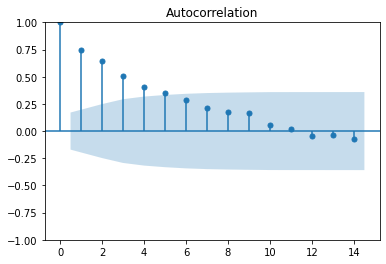

In [41]:
# To find Q_value for Seasonality
plot_acf(data["seasonality"].dropna(),lags=14)
plt.show()

In [ ]:
# Now We Have To Assign Trend And Seasonality parameter
#pdq = Trend
# p = 2
# d = 2
# q= 2
# PDQ
# P=2
# D=1
# Q=5

In [42]:
# Building Time Series Model
# Since We Got All Parameter Value

from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [43]:
model = sm.tsa.statespace.SARIMAX(data["Thousand Of Passenger"],order=(2,2,2),seasonal_order=(2,1,5,12))

C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [44]:
result=model.fit()

C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [45]:
print(result.summary())

                                            SARIMAX Results                                             
Dep. Variable:                            Thousand Of Passenger   No. Observations:                  144
Model:             SARIMAX(2, 2, 2)x(2, 1, [1, 2, 3, 4, 5], 12)   Log Likelihood                -497.262
Date:                                          Sun, 04 Sep 2022   AIC                           1018.525
Time:                                                  18:18:40   BIC                           1052.935
Sample:                                              01-01-1949   HQIC                          1032.507
                                                   - 12-01-1960                                         
Covariance Type:                                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar

In [52]:
model = sm.tsa.statespace.SARIMAX(data["Thousand Of Passenger"],order=(2,2,2),seasonal_order=(2,1,1,12))



C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [53]:
result=model.fit()

In [54]:
print(result.summary())

                                      SARIMAX Results                                       
Dep. Variable:                Thousand Of Passenger   No. Observations:                  144
Model:             SARIMAX(2, 2, 2)x(2, 1, [1], 12)   Log Likelihood                -498.102
Date:                              Sun, 04 Sep 2022   AIC                           1012.204
Time:                                      18:25:33   BIC                           1035.144
Sample:                                  01-01-1949   HQIC                          1021.526
                                       - 12-01-1960                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3457      0.092    -14.626      0.000      -1.526      -1.165
ar.L2         -0.42

In [60]:
# Auto ARIMA APPROCH

import itertools
p =d =q = range(0,2)
pdq=list(itertools.product(p,d,q))
seasonal_pdq=[(x[0],x[1],x[2],12) for x in pdq]

print("few parameter Combination are : ")
print("{} x {}".format(pdq[1],seasonal_pdq[1]))
print("{} x {}".format(pdq[2],seasonal_pdq[2]))

few parameter Combination are : 
(0, 0, 1) x (0, 0, 1, 12)
(0, 1, 0) x (0, 1, 0, 12)


In [62]:
# We Implement Above Parameters by the help of permutation and combination technique
# Also, Substituting Stationary and non Stationary value To get Best aic Value

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(data["Thousand Of Passenger"], order=params,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results=model.fit()
            print("ARIMA{} x {} -AIC:{}".format(param,param_seasonal,results.aic))
        except:
            continue
            

C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 0) x (0, 0, 0, 12) -AIC:1377.2926858930794
ARIMA(0, 0, 0) x (0, 0, 1, 12) -AIC:1185.3340359695023
ARIMA(0, 0, 0) x (0, 1, 0, 12) -AIC:1008.5528813482252


C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 0) x (0, 1, 1, 12) -AIC:922.4148960116223


C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 0) x (1, 0, 0, 12) -AIC:1009.1896100682577


C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 0) x (1, 0, 1, 12) -AIC:987.1339264660204
ARIMA(0, 0, 0) x (1, 1, 0, 12) -AIC:929.5756208330691


C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 0) x (1, 1, 1, 12) -AIC:922.2053774351893
ARIMA(0, 0, 1) x (0, 0, 0, 12) -AIC:1377.2926858930794


C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1) x (0, 0, 1, 12) -AIC:1185.3340359695023
ARIMA(0, 0, 1) x (0, 1, 0, 12) -AIC:1008.5528813482252


C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1) x (0, 1, 1, 12) -AIC:922.4148960116223


C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1) x (1, 0, 0, 12) -AIC:1009.1896100682577


C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1) x (1, 0, 1, 12) -AIC:987.1339264660204
ARIMA(0, 0, 1) x (1, 1, 0, 12) -AIC:929.5756208330691


C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1) x (1, 1, 1, 12) -AIC:922.2053774351893
ARIMA(0, 1, 0) x (0, 0, 0, 12) -AIC:1377.2926858930794


C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 0) x (0, 0, 1, 12) -AIC:1185.3340359695023
ARIMA(0, 1, 0) x (0, 1, 0, 12) -AIC:1008.5528813482252


C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 0) x (0, 1, 1, 12) -AIC:922.4148960116223
ARIMA(0, 1, 0) x (1, 0, 0, 12) -AIC:1009.1896100682577


C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 0) x (1, 0, 1, 12) -AIC:987.1339264660204
ARIMA(0, 1, 0) x (1, 1, 0, 12) -AIC:929.5756208330691


C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 0) x (1, 1, 1, 12) -AIC:922.2053774351893
ARIMA(0, 1, 1) x (0, 0, 0, 12) -AIC:1377.2926858930794


C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 1) x (0, 0, 1, 12) -AIC:1185.3340359695023
ARIMA(0, 1, 1) x (0, 1, 0, 12) -AIC:1008.5528813482252


C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 1) x (0, 1, 1, 12) -AIC:922.4148960116223
ARIMA(0, 1, 1) x (1, 0, 0, 12) -AIC:1009.1896100682577


C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 1) x (1, 0, 1, 12) -AIC:987.1339264660204
ARIMA(0, 1, 1) x (1, 1, 0, 12) -AIC:929.5756208330691


C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 1) x (1, 1, 1, 12) -AIC:922.2053774351893
ARIMA(1, 0, 0) x (0, 0, 0, 12) -AIC:1377.2926858930794


C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 0) x (0, 0, 1, 12) -AIC:1185.3340359695023
ARIMA(1, 0, 0) x (0, 1, 0, 12) -AIC:1008.5528813482252


C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 0) x (0, 1, 1, 12) -AIC:922.4148960116223


C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 0) x (1, 0, 0, 12) -AIC:1009.1896100682577


C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 0) x (1, 0, 1, 12) -AIC:987.1339264660204
ARIMA(1, 0, 0) x (1, 1, 0, 12) -AIC:929.5756208330691


C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 0) x (1, 1, 1, 12) -AIC:922.2053774351893
ARIMA(1, 0, 1) x (0, 0, 0, 12) -AIC:1377.2926858930794


C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1) x (0, 0, 1, 12) -AIC:1185.3340359695023
ARIMA(1, 0, 1) x (0, 1, 0, 12) -AIC:1008.5528813482252


C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1) x (0, 1, 1, 12) -AIC:922.4148960116223
ARIMA(1, 0, 1) x (1, 0, 0, 12) -AIC:1009.1896100682577


C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1) x (1, 0, 1, 12) -AIC:987.1339264660204
ARIMA(1, 0, 1) x (1, 1, 0, 12) -AIC:929.5756208330691


C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1) x (1, 1, 1, 12) -AIC:922.2053774351893
ARIMA(1, 1, 0) x (0, 0, 0, 12) -AIC:1377.2926858930794


C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 0) x (0, 0, 1, 12) -AIC:1185.3340359695023
ARIMA(1, 1, 0) x (0, 1, 0, 12) -AIC:1008.5528813482252


C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 0) x (0, 1, 1, 12) -AIC:922.4148960116223
ARIMA(1, 1, 0) x (1, 0, 0, 12) -AIC:1009.1896100682577


C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 0) x (1, 0, 1, 12) -AIC:987.1339264660204
ARIMA(1, 1, 0) x (1, 1, 0, 12) -AIC:929.5756208330691


C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 0) x (1, 1, 1, 12) -AIC:922.2053774351893
ARIMA(1, 1, 1) x (0, 0, 0, 12) -AIC:1377.2926858930794


C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1) x (0, 0, 1, 12) -AIC:1185.3340359695023
ARIMA(1, 1, 1) x (0, 1, 0, 12) -AIC:1008.5528813482252


C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1) x (0, 1, 1, 12) -AIC:922.4148960116223
ARIMA(1, 1, 1) x (1, 0, 0, 12) -AIC:1009.1896100682577


C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1) x (1, 0, 1, 12) -AIC:987.1339264660204
ARIMA(1, 1, 1) x (1, 1, 0, 12) -AIC:929.5756208330691


C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1) x (1, 1, 1, 12) -AIC:922.2053774351893


In [ ]:
# Final Result
#ARIMA(0, 1, 0) x (1, 1, 1, 12) -AIC:922.2053774351893

In [ ]:
# Prediction Required as how many passenger will travel in the Coming month years

In [63]:
len(data)

144

In [64]:
data.head()

,Thousand Of Passenger,1st Diff,2nd Diff,seasonality
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN


In [66]:
data["Forecast"] = results.predict(start=130,end=144,dynamic=True)


<AxesSubplot:xlabel='Month'>

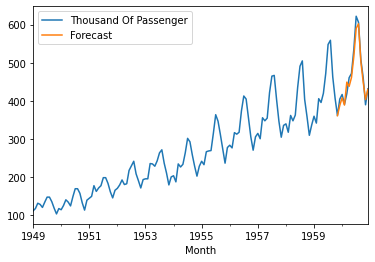

In [67]:
data[["Thousand Of Passenger","Forecast"]].plot()

In [68]:
from pandas.tseries.offsets import DateOffset

In [71]:
future_datas=[data.index[-1]+DateOffset(months=x) for x in range(0,61)]

In [72]:
future_datas

[Timestamp('1960-12-01 00:00:00'),
 Timestamp('1961-01-01 00:00:00'),
 Timestamp('1961-02-01 00:00:00'),
 Timestamp('1961-03-01 00:00:00'),
 Timestamp('1961-04-01 00:00:00'),
 Timestamp('1961-05-01 00:00:00'),
 Timestamp('1961-06-01 00:00:00'),
 Timestamp('1961-07-01 00:00:00'),
 Timestamp('1961-08-01 00:00:00'),
 Timestamp('1961-09-01 00:00:00'),
 Timestamp('1961-10-01 00:00:00'),
 Timestamp('1961-11-01 00:00:00'),
 Timestamp('1961-12-01 00:00:00'),
 Timestamp('1962-01-01 00:00:00'),
 Timestamp('1962-02-01 00:00:00'),
 Timestamp('1962-03-01 00:00:00'),
 Timestamp('1962-04-01 00:00:00'),
 Timestamp('1962-05-01 00:00:00'),
 Timestamp('1962-06-01 00:00:00'),
 Timestamp('1962-07-01 00:00:00'),
 Timestamp('1962-08-01 00:00:00'),
 Timestamp('1962-09-01 00:00:00'),
 Timestamp('1962-10-01 00:00:00'),
 Timestamp('1962-11-01 00:00:00'),
 Timestamp('1962-12-01 00:00:00'),
 Timestamp('1963-01-01 00:00:00'),
 Timestamp('1963-02-01 00:00:00'),
 Timestamp('1963-03-01 00:00:00'),
 Timestamp('1963-04-

In [74]:
future_dates_df=pd.DataFrame(index=future_datas[1:],columns=data.columns)

In [75]:
future_dates_df

,Thousand Of Passenger,1st Diff,2nd Diff,seasonality,Forecast
1961-01-01,NaN,NaN,NaN,NaN,NaN
1961-02-01,NaN,NaN,NaN,NaN,NaN
1961-03-01,NaN,NaN,NaN,NaN,NaN
1961-04-01,NaN,NaN,NaN,NaN,NaN
1961-05-01,NaN,NaN,NaN,NaN,NaN
1961-06-01,NaN,NaN,NaN,NaN,NaN
1961-07-01,NaN,NaN,NaN,NaN,NaN
1961-08-01,NaN,NaN,NaN,NaN,NaN
1961-09-01,NaN,NaN,NaN,NaN,NaN
1961-10-01,NaN,NaN,NaN,NaN,NaN


In [76]:
future_data=pd.concat([data,future_dates_df])

In [77]:
future_data.head()

,Thousand Of Passenger,1st Diff,2nd Diff,seasonality,Forecast
1949-01-01,112.0,NaN,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN,NaN
1949-04-01,129.0,-3.0,-17.0,NaN,NaN
1949-05-01,121.0,-8.0,-5.0,NaN,NaN


C:\Users\mrabh\.conda\envs\myNewEnv\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


<AxesSubplot:>

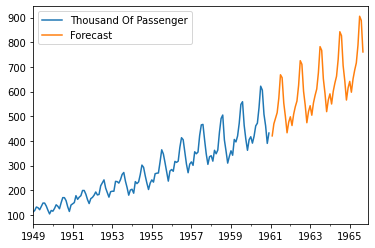

In [79]:
future_data["Forecast"]=result.predict(start=145,end=200,dynamic=True)
future_data[["Thousand Of Passenger","Forecast"]].plot()

In [78]:
len(data)

144

In [81]:
future_data.tail(10)

,Thousand Of Passenger,1st Diff,2nd Diff,seasonality,Forecast
1965-03-01,NaN,NaN,NaN,NaN,651.134517
1965-04-01,NaN,NaN,NaN,NaN,686.778118
1965-05-01,NaN,NaN,NaN,NaN,716.600924
1965-06-01,NaN,NaN,NaN,NaN,788.691074
1965-07-01,NaN,NaN,NaN,NaN,905.603690
1965-08-01,NaN,NaN,NaN,NaN,888.676497
1965-09-01,NaN,NaN,NaN,NaN,760.842416
1965-10-01,NaN,NaN,NaN,NaN,NaN
1965-11-01,NaN,NaN,NaN,NaN,NaN
1965-12-01,NaN,NaN,NaN,NaN,NaN


In [ ]:
# This Is all about The Time Seriws Forecasting

In [83]:
future_data.to_csv("Forecasting Data For Next 5 Years")
future_data.to_excel("Forecasting Data For Next 5 Years.xlsx")